<a href="https://colab.research.google.com/github/PolisenoRiccardo/verifiche/blob/main/Poliseno_Correzione_Verifica_MatPlotLib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Verifica 1

Prendere in considerazione i dati presenti al link


In [1]:
import pandas as pd
df0 = pd.read_json('https://raw.githubusercontent.com/wtitze/4E/main/comuni_italiani.json')
df0

,_id,Denominazione in italiano,Provincia,Denominazione Regione,Ripartizione geografica
0,{'$oid': '619f9ec67727bc651542bb9f'},Agliè,Torino,Piemonte,Nord-ovest
1,{'$oid': '619f9ec67727bc651542bba0'},Airasca,Torino,Piemonte,Nord-ovest
2,{'$oid': '619f9ec67727bc651542bba1'},Ala di Stura,Torino,Piemonte,Nord-ovest
3,{'$oid': '619f9ec67727bc651542bba2'},Albiano d'Ivrea,Torino,Piemonte,Nord-ovest
4,{'$oid': '619f9ec67727bc651542bba3'},Almese,Torino,Piemonte,Nord-ovest
...,...,...,...,...,...
7902,{'$oid': '619f9ec67727bc651542da7d'},Villasor,Sud Sardegna,Sardegna,Isole
7903,{'$oid': '619f9ec67727bc651542da7e'},Villaspeciosa,Sud Sardegna,Sardegna,Isole
7904,{'$oid': '619fa3557727bc651542da80'},NaN,Torino,Piemonte,Nord-ovest
7905,{'$oid': '619fa3c57727bc651542da81'},NaN,Gorizia,Friuli-Venezia Giulia,Nord-est


1. il numero di comuni italiani

In [2]:
len(df0)

7907

2. il numero di province italiane

In [3]:
len(df0.groupby('Provincia').count())

107

3. il numero di province per ogni regione

In [4]:
dfoup=df0.groupby(['Denominazione Regione', 'Provincia']).count()
dfoup.groupby('Denominazione Regione').count()[['_id']]

,_id
Denominazione Regione,
Abruzzo,4
Basilicata,2
Calabria,5
Campania,5
Emilia-Romagna,9
Friuli-Venezia Giulia,4
Lazio,5
Liguria,4
Lombardia,12


4. il numero di comuni per ogni provincia. Ordinare in ordina decrescente partire dalla regione con più comuni

In [5]:
df0.groupby('Provincia').count()[['_id']].sort_values(by='_id', ascending=False)

,_id
Provincia,
Torino,313
Cuneo,247
Bergamo,243
Brescia,205
Alessandria,187
...,...
Massa-Carrara,17
Ragusa,12
Barletta-Andria-Trani,10


5. la provincia con meno comuni

In [6]:
dfoup = df0.groupby('Provincia').count()[['_id']].sort_values(by='_id', ascending=False)
dfoup[dfoup['_id']==min(dfoup['_id'])].drop('_id', axis=1)

""
Provincia
Trieste


6. la regione con più province

In [7]:
dfoup = df0.groupby(['Denominazione Regione', 'Provincia']).count()[['_id']]
dfoup1 = dfoup.groupby('Denominazione Regione').count()[['_id']]
dfoup1[dfoup1['_id']==max(dfoup1['_id'])].drop('_id', axis=1)

""
Denominazione Regione
Lombardia


7. il numero medio di comuni nelle varie province

In [8]:
dfoup = df0.groupby('Provincia').count()[['_id']].sort_values(by='_id', ascending=False)
dfoup.mean()

_id    73.897196
dtype: float64

8. il grafico a barre orizzontali dell'esercizio 3

In [9]:
import matplotlib.pyplot as plt

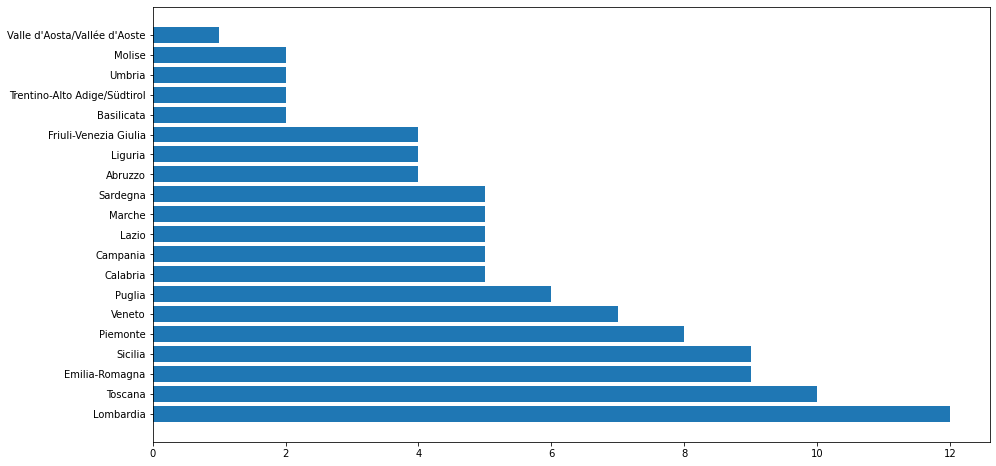

In [10]:
dfoup=df0.groupby(['Denominazione Regione', 'Provincia'], as_index=False).count()
dfdati = dfoup.groupby('Denominazione Regione').count()[['_id']].sort_values(by='_id', ascending=False)
labels = dfdati.index
dati = dfdati['_id']


fig, ax = plt.subplots(figsize=(15,8))
ax.barh(labels, dati, label='Regioni')
plt.show()

9. il grafico treemap dell'esercizio 3

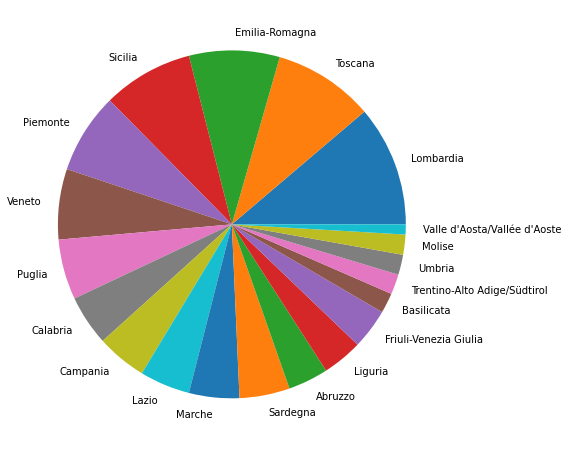

In [11]:
dfoup=df0.groupby(['Denominazione Regione', 'Provincia'], as_index=False).count()
dfdati = dfoup.groupby('Denominazione Regione').count()[['_id']].sort_values(by='_id', ascending=False)
labels = dfdati.index
dati = dfdati['_id']

plt.figure(figsize=(15, 8))
plt.pie(dati, labels=labels)
plt.show()
     

Seconda parte verifica 1

In [12]:
df1 = pd.read_csv('https://raw.githubusercontent.com/wtitze/4E/main/netflix_titles.csv')
df1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


1. il numero di film (movie)

In [13]:
len(df1)

8807

2. il numero di film di cui non si conosce la nazione

In [14]:
df1[df1.country.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8718,s8719,Movie,Westside vs. the World,Michael Fahey,"Ron Perlman, Louie Simmons",NaN,"August 9, 2019",2019,TV-MA,96 min,"Documentaries, Sports Movies",A look into the journey of influential strengt...
8759,s8760,Movie,World's Weirdest Homes,Storm Theunissen,Charlie Luxton,NaN,"February 1, 2019",2015,TV-PG,49 min,Movies,From a bubble-shaped palace to an island built...
8783,s8784,TV Show,Yoko,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,"June 23, 2018",2016,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b..."
8785,s8786,TV Show,YOM,NaN,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,"June 7, 2018",2016,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o..."


3. il numero di tv show rilasciati del 2010 al 2015 (estremi compresi)

In [15]:
len(df1[(df1.release_year > 2009) & (df1.release_year < 2016)])

1816

4. i titoli delle docuseries

In [16]:
df1[df1.listed_in.str.contains('Docuseries')][['title']]

,title
3,Jailbirds New Orleans
10,"Vendetta: Truth, Lies and The Mafia"
14,Crime Stories: India Detectives
20,Monsters Inside: The 24 Faces of Billy Milligan
25,Love on the Spectrum
...,...
8712,Weird Wonders of the World
8740,Wild Alaska
8741,Wild Arabia
8755,Women Behind Bars


5. i titoli dei TV show che hanno nel titolo la parola zombie

In [17]:
df1[df1.title.str.contains('zombie') | df1.title.str.contains('Zombie')][['title']]

,title
3601,IZombie
7871,Rise of the Zombie
7959,Scooby-Doo on Zombie Island
8803,Zombie Dumb
8804,Zombieland


6. i film che sono stati aggiunti nel settembre 2021

In [18]:
df1[df1.date_added.str.contains('September') & df1.date_added.str.contains('2021')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
178,s179,Movie,The Interview,"Evan Goldberg, Seth Rogen","James Franco, Seth Rogen, Lizzy Caplan, Randal...",United States,"September 1, 2021",2014,R,112 min,"Action & Adventure, Comedies",Seth Rogen and James Franco star in this provo...
179,s180,Movie,The Nutty Professor,Tom Shadyac,"Eddie Murphy, Jada Pinkett Smith, James Coburn...",United States,"September 1, 2021",1996,PG-13,95 min,"Comedies, Romantic Movies","After being made fun of for his weight, a kind..."
180,s181,Movie,The Nutty Professor II: The Klumps,Peter Segal,"Eddie Murphy, Janet Jackson, Larry Miller, Joh...",NaN,"September 1, 2021",2000,PG-13,107 min,"Comedies, Romantic Movies","After getting engaged, Sherman Klump prepares ..."
181,s182,TV Show,Turning Point: 9/11 and the War on Terror,NaN,NaN,NaN,"September 1, 2021",2021,TV-14,1 Season,Docuseries,This unflinching series documents the 9/11 ter...


7. il numero di TV show iniziati in ogni anno

In [19]:
df1.groupby('release_year').count()[['type']]

,type
release_year,
1925,1
1942,2
1943,3
1944,3
1945,4
...,...
2017,1032
2018,1147
2019,1030


8. il grafico a barre verticali dell'esercizio 7

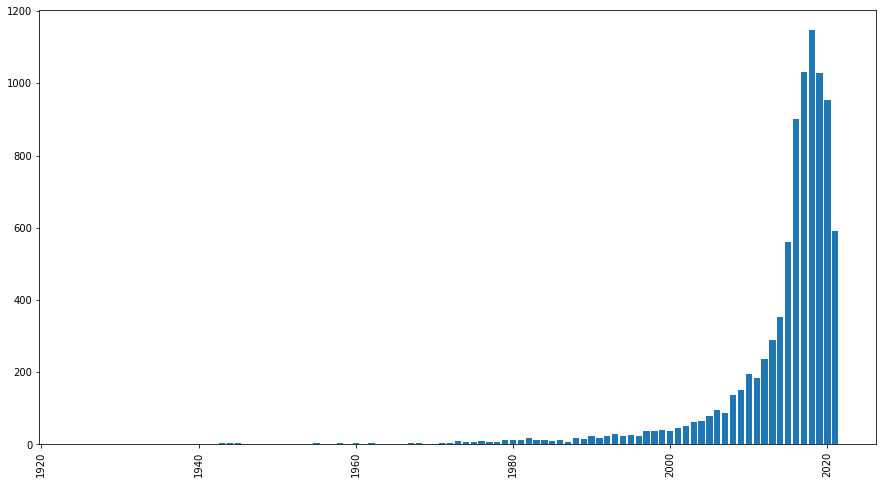

In [20]:
dfdati = df1.groupby('release_year').count()[['type']]
labels = dfdati.index
dati = dfdati['type']

fig, ax = plt.subplots(figsize=(15,8))
ax.bar(labels, dati, label='Film rilasciati per ogni anno')
plt.xticks(rotation=90)
plt.show()

9. il grafico a torta dell'esercizio 7


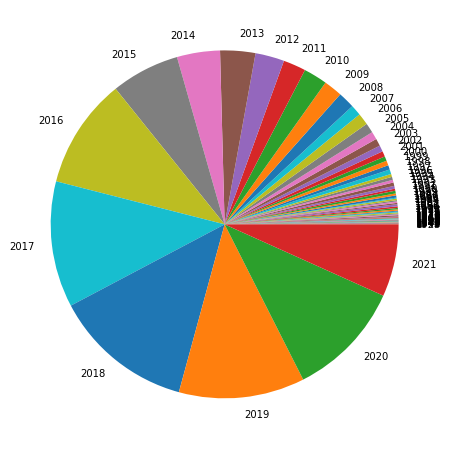

In [21]:
dfdati = df1.groupby('release_year').count()[['type']]
labels = dfdati.index
dati = dfdati['type']

plt.figure(figsize=(15, 8))
plt.pie(dati, labels=labels)
plt.show() 

#Verifica 2

Prendere in considerazione i dati presenti al link

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/wtitze/4E/main/prime_titles.csv')
df

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...,...
399,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,403,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. eliminare tutte le righe che non hanno dati

In [23]:
df = df.drop(df.index[df['Name of the show'].isnull()])

2. visualizzare il numero di film per ogni lingua

In [24]:
df.groupby('Language').count()[['S.no.']]

,S.no.
Language,
Deutsch,2
English,314
French,2
Hebrew,1
Hindi,39
Italiano,7
Japanese,13
Marathi,2
Nederlands,2


3. visualizzare il numero di show per ogni anno

In [25]:
df.groupby('Year of release').count()[['S.no.']]

,S.no.
Year of release,
1926.0,1
1956.0,2
1957.0,1
1958.0,2
1959.0,2
1960.0,3
1967.0,1
1979.0,1
1980.0,1


4. visualizzare gli anni in cui sono stati prodotti più di 50 show

In [26]:
dfoup = df.groupby('Year of release').count()[['S.no.']]
dfoup[dfoup['S.no.'] > 50]

,S.no.
Year of release,
2018.0,62


5. visualizzare l'anno in cui sono stati prodotti più show

In [27]:
dfoup[dfoup['S.no.'] == dfoup['S.no.'].max()].drop('S.no.', axis=1)

""
Year of release
2018.0


6. visualizzare il numero di film drammatici inglesi del 2017

In [28]:
df[(df.Genre.str.contains('Drama')) & (df.Language == 'English') & (df['Year of release'] == 2017 )]

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
24,25,American Gods,2017.0,2.0,English,"Sci-fi, Drama, Suspense",7.8,18+
51,52,This is Us,2017.0,3.0,English,Drama,8.7,16+
70,71,The American Playboy: The Hugh Hefner Story,2017.0,1.0,English,"Drama, Documentary",NaN,18+
75,76,Taken,2017.0,2.0,English,"Drama, Action",NaN,16+
85,86,The Handmaid's Tale,2017.0,3.0,English,Drama,8.5,18+
98,99,Lethal Weapon,2017.0,3.0,English,"Drama, Action",7.9,16+
101,102,Patriot,2017.0,2.0,English,"Drama, Suspense",8.3,18+
115,116,Famous in Love,2017.0,2.0,English,"Drama, Romance",6.9,All
120,121,You are Wanted,2017.0,3.0,English,Drama,NaN,13+


7. visualizzare il rating medio dei film di ogni lingua

In [29]:
df.groupby('Language').mean()[['IMDb rating']]

,IMDb rating
Language,
Deutsch,8.100000
English,7.389032
French,NaN
Hebrew,NaN
Hindi,7.358824
Italiano,NaN
Japanese,6.485714
Marathi,NaN
Nederlands,NaN


8. visualizzare il grafico a barre verticali dell'esercizio 7

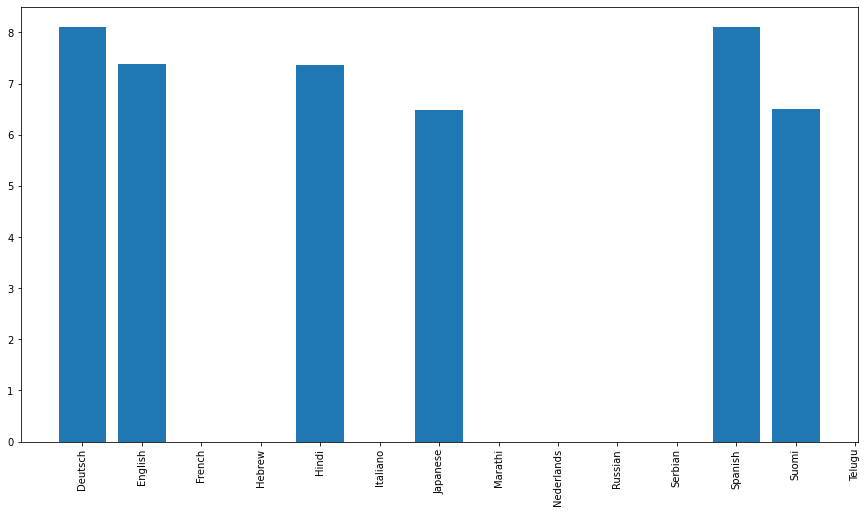

In [30]:
dfdati = df.groupby('Language').mean()[['IMDb rating']]
labels = dfdati.index
dati = dfdati['IMDb rating']

fig, ax = plt.subplots(figsize=(15,8))
ax.bar(labels, dati, label='Film prodotti per ogni lingua')
plt.xticks(rotation=90)
plt.show()

9. visualizzare il grafico a barre orizzontali dell'esercizio 7

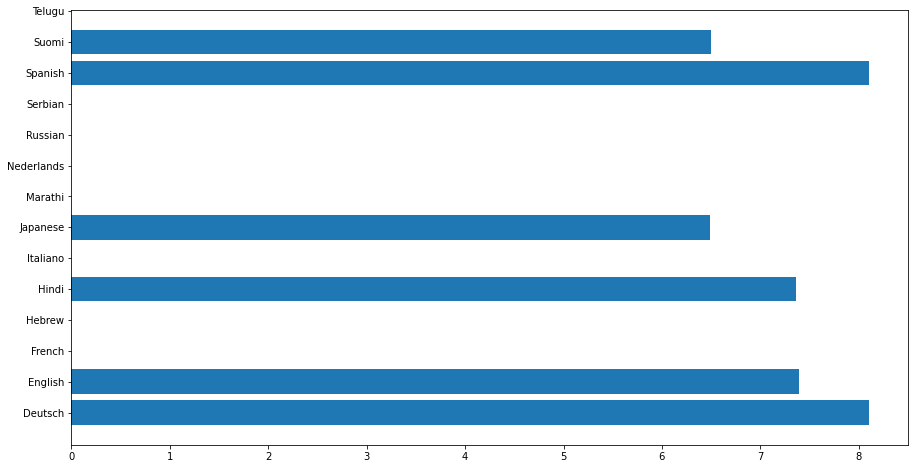

In [31]:
dfdati = df.groupby('Language').mean()[['IMDb rating']]
labels = dfdati.index
dati = dfdati['IMDb rating']
fig, ax = plt.subplots(figsize=(15,8))
ax.barh(labels, dati, label='Film prodotti per ogni lingua')
plt.show()

Seconda parte

In [32]:
df = pd.read_csv('https://raw.githubusercontent.com/wtitze/4E/main/ristoranti.csv')
df

,N,address,borough,cuisine,grades,name,restaurant_id
0,0,"{'building': '8825', 'coord': [-73.8803827, 40...",Queens,American,"[{'date': datetime.datetime(2014, 11, 15, 0, 0...",Brunos On The Boulevard,40356151
1,1,"{'building': '156-71', 'coord': [-73.840437, 4...",Queens,Pizza/Italian,"[{'date': datetime.datetime(2014, 10, 29, 0, 0...",New Park Pizzeria & Restaurant,40364744
2,2,"{'building': '6409', 'coord': [-74.00528899999...",Brooklyn,American,"[{'date': datetime.datetime(2014, 7, 18, 0, 0)...",Regina Caterers,40356649
3,3,"{'building': '2491', 'coord': [-74.1459332, 40...",Staten Island,Delicatessen,"[{'date': datetime.datetime(2015, 1, 9, 0, 0),...",Bagels N Buns,40363427
4,4,"{'building': '56', 'coord': [-74.004758, 40.74...",Manhattan,American,"[{'date': datetime.datetime(2014, 6, 10, 0, 0)...",Old Homestead,40364715
...,...,...,...,...,...,...,...
25354,25354,"{'building': 'ONE', 'coord': [-81.664363600000...",Queens,Other,[],Camden Food Express,50018316
25355,25355,"{'building': '700', 'coord': [-73.988230600000...",Manhattan,Other,[],Wooly'S Nyc,50018495
25356,25356,"{'building': '2144', 'coord': [-73.9552561, 40...",Manhattan,Other,[],Rafi 786,50018553
25357,25357,"{'building': '1448', 'coord': [-73.93032629999...",Brooklyn,Other,[],NaN,50018721


1. eliminare tutte le colonne tranne borough (quartiere), cuisine e name

In [33]:
df = df.drop(['N', 'address', 'grades', 'restaurant_id'], axis=1)
df

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Pizza/Italian,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Delicatessen,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,Other,Camden Food Express
25355,Manhattan,Other,Wooly'S Nyc
25356,Manhattan,Other,Rafi 786
25357,Brooklyn,Other,NaN


2. visualizzare il numero di ristoranti dei Queens

In [34]:
len(df[df['borough'] == 'Queens'])

5656

3. visualizzare il numero di ristoranti per ogni quartiere

In [35]:
df.groupby('borough').count()[['name']].drop('Missing', axis=0)

,name
borough,
Bronx,2322
Brooklyn,6046
Manhattan,10211
Queens,5615
Staten Island,963


4. visualizzare il numero di tipi di cucina per ogni quartiere

In [36]:
dfoup = df.groupby(['borough', 'cuisine']).count().drop('Missing', axis=0)
dfoup.groupby('borough').count()

,name
borough,
Bronx,52
Brooklyn,80
Manhattan,82
Queens,74
Staten Island,56


5. visualizzare i ristoranti che hanno la parola bagels nel nome

In [37]:
df[(df.name.notnull()) & (df.name.str.contains('Bagels'))]

,borough,cuisine,name
3,Staten Island,Delicatessen,Bagels N Buns
64,Queens,Bagels/Pretzels,Hot Bagels
395,Staten Island,Delicatessen,Plaza Bagels & Deli
504,Manhattan,Bagels/Pretzels,Absolute Bagels
654,Manhattan,Delicatessen,Tal Bagels Deli
...,...,...,...
23517,Brooklyn,Bagels/Pretzels,Bagels & Bialys
24264,Manhattan,Bagels/Pretzels,Bagels Express
24398,Brooklyn,American,Montague St Bagels
24690,Manhattan,Bagels/Pretzels,Acts 3 Bagels


6. visualizzare i ristoranti di cui non si conosce il nome

In [38]:
df[df.name.isnull()]

,borough,cuisine,name
24509,Brooklyn,Other,NaN
24526,Manhattan,Other,NaN
24527,Manhattan,Other,NaN
24528,Staten Island,Other,NaN
24571,Manhattan,Other,NaN
...,...,...,...
25345,Manhattan,Other,NaN
25346,Queens,Other,NaN
25350,Manhattan,Other,NaN
25351,Bronx,Other,NaN


7. visualizzare il quartiere con meno ristoranti

In [39]:
dfoup = df.groupby('borough').count()[['name']].drop('Missing', axis=0)
dfoup[dfoup.name == int(dfoup.min())].drop('name', axis=1)

""
borough
Staten Island


8. visualizzare il grafico treemap dell'esercizio 3

In [40]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


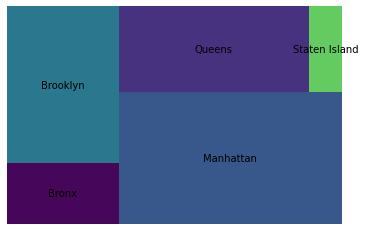

In [41]:
import squarify

dfdati = df.groupby('borough').count()[['name']].drop('Missing', axis=0)
dati = dfdati.name
labels = dfdati.index

squarify.plot(dati, label=labels, alpha=1)
plt.axis('off')
plt.show()

9. visualizzare il grafico a torta dell'esercizio 4

<ipython-input-42-a7c8c9ecb761>:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(dati, labels=labels)


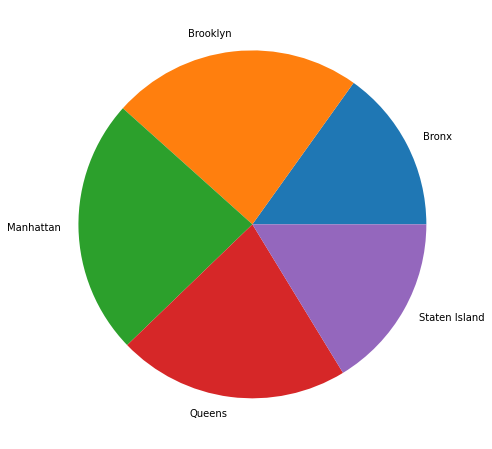

In [42]:
dftorta = df.groupby(['borough', 'cuisine']).count().drop('Missing', axis=0)
dfdati = dftorta.groupby('borough').count()
dati = dfdati
labels = dfdati.index

plt.figure(figsize=(15, 8))
plt.pie(dati, labels=labels)
plt.show()
     

In [43]:
df = pd.read_csv('https://raw.githubusercontent.com/wtitze/4E/main/prime_titles.csv')
df

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...,...
399,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,403,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Verifica 3

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/wtitze/4E/main/prime_titles.csv')
df

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...,...
399,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,403,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. visualizzare le serie TV che hanno più di due stagioni

In [45]:
dfoup = df.groupby('Name of the show').count()[['S.no.']]
dfoup[dfoup['S.no.'] > 1]

,S.no.
Name of the show,
The Last Ship,2
The Missing,2


2. visualizzare il numero di film per ogni lingua

In [46]:
df.groupby('Language').count()[['S.no.']]

,S.no.
Language,
Deutsch,2
English,314
French,2
Hebrew,1
Hindi,39
Italiano,7
Japanese,13
Marathi,2
Nederlands,2


3. visualizzare il numero di show per ogni anno

In [47]:
df.groupby('Year of release').count()[['S.no.']]

,S.no.
Year of release,
1926.0,1
1956.0,2
1957.0,1
1958.0,2
1959.0,2
1960.0,3
1967.0,1
1979.0,1
1980.0,1


4. visualizzare gli anni in cui sono stati prodotti meno di 40 show

In [48]:
dfoup = df.groupby('Year of release').count()[['S.no.']]
dfoup[dfoup['S.no.'] < 40]

,S.no.
Year of release,
1926.0,1
1956.0,2
1957.0,1
1958.0,2
1959.0,2
1960.0,3
1967.0,1
1979.0,1
1980.0,1


5. visualizzare l'anno in cui sono stati prodotti più show

In [49]:
dfoup = df.groupby('Year of release').count()[['S.no.']]
dfoup[dfoup['S.no.'] == dfoup['S.no.'].max()].drop('S.no.',axis=1)

""
Year of release
2018.0


6. visualizzare il numero di commedie in hindi del 2017

In [50]:
df[(df.Language == 'Hindi') & (df['Year of release'] ==2017)]

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
11,12,Inside Edge,2017.0,2.0,Hindi,"Sports, Drama",8.0,18+
33,34,Laakhon Mein Ek,2017.0,2.0,Hindi,Drama,NaN,16+
66,67,Pushpavalli,2017.0,2.0,Hindi,"Drama, Comedy",NaN,16+
307,308,Going Viral Pvt. Ltd.,2017.0,1.0,Hindi,Comedy,NaN,All


7. visualizzare il rating medio dei film di ogni lingua

In [51]:
df.groupby('Language').mean()[['IMDb rating']]

,IMDb rating
Language,
Deutsch,8.100000
English,7.389032
French,NaN
Hebrew,NaN
Hindi,7.358824
Italiano,NaN
Japanese,6.485714
Marathi,NaN
Nederlands,NaN


8. visualizzare il grafico a barre verticali dell'esercizio 7

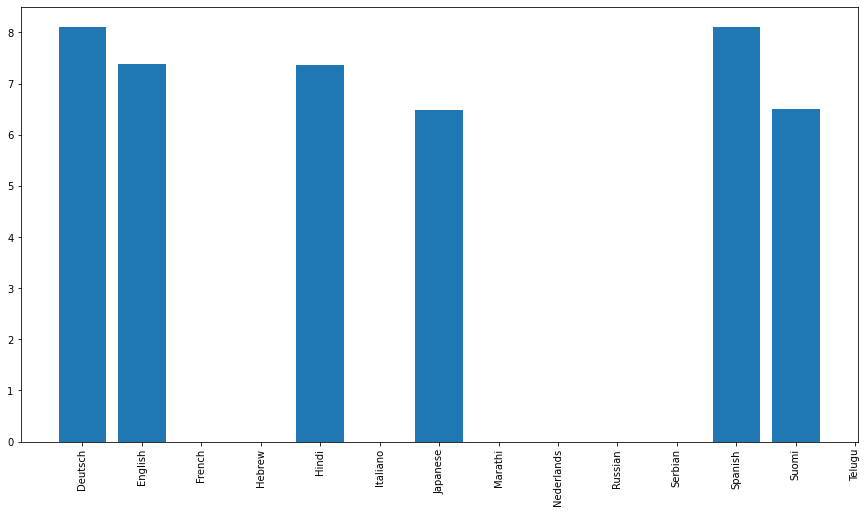

In [52]:
dfdati = df.groupby('Language').mean()[['IMDb rating']]
labels = dfdati.index
dati = dfdati['IMDb rating']

fig, ax = plt.subplots(figsize=(15,8))
ax.bar(labels, dati, label='Film prodotti per ogni lingua')
plt.xticks(rotation=90)
plt.show()

9. visualizzare il grafico a barre orizzontali dell'esercizio 7

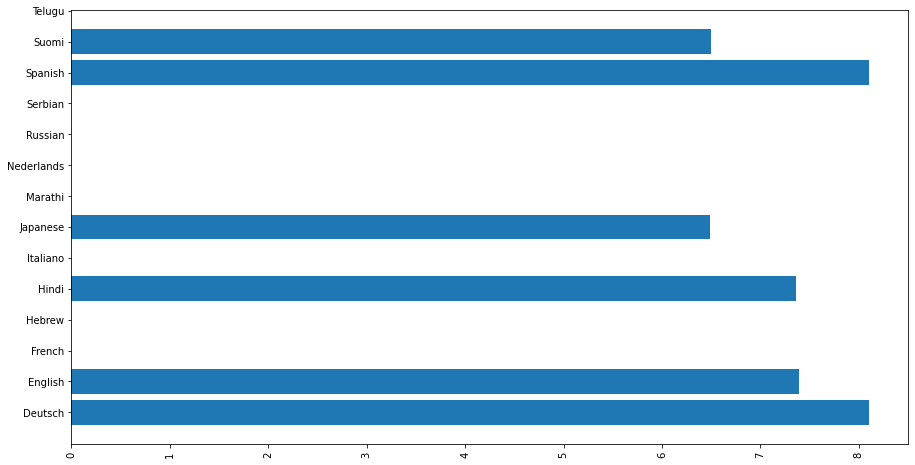

In [53]:
dfdati = df.groupby('Language').mean()[['IMDb rating']]
labels = dfdati.index
dati = dfdati['IMDb rating']

fig, ax = plt.subplots(figsize=(15,8))
ax.barh(labels, dati, label='Film prodotti per ogni lingua')
plt.xticks(rotation=90)
plt.show()

Seconda Parte

In [54]:
df1 = pd.read_csv('https://raw.githubusercontent.com/wtitze/4E/main/netflix_titles.csv')
df1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


1. il numero di film (movie)

In [55]:
len(df1)

8807

2. il numero di film di cui non si conosce la nazione

In [56]:
df1[df1.country.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8718,s8719,Movie,Westside vs. the World,Michael Fahey,"Ron Perlman, Louie Simmons",NaN,"August 9, 2019",2019,TV-MA,96 min,"Documentaries, Sports Movies",A look into the journey of influential strengt...
8759,s8760,Movie,World's Weirdest Homes,Storm Theunissen,Charlie Luxton,NaN,"February 1, 2019",2015,TV-PG,49 min,Movies,From a bubble-shaped palace to an island built...
8783,s8784,TV Show,Yoko,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,"June 23, 2018",2016,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b..."
8785,s8786,TV Show,YOM,NaN,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,"June 7, 2018",2016,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o..."


3. il numero di tv show rilasciati del 2010 al 2015 (estremi compresi)

In [57]:
len(df1[(df1.release_year > 2009) & (df1.release_year < 2016)])

1816

4. i titoli delle docuseries

In [58]:
df1[df1.listed_in.str.contains('Docuseries')][['title']]

,title
3,Jailbirds New Orleans
10,"Vendetta: Truth, Lies and The Mafia"
14,Crime Stories: India Detectives
20,Monsters Inside: The 24 Faces of Billy Milligan
25,Love on the Spectrum
...,...
8712,Weird Wonders of the World
8740,Wild Alaska
8741,Wild Arabia
8755,Women Behind Bars


5. i titoli dei TV show che hanno nel titolo la parola zombie

In [59]:
df1[df1.title.str.contains('zombie') | df1.title.str.contains('Zombie')][['title']]

,title
3601,IZombie
7871,Rise of the Zombie
7959,Scooby-Doo on Zombie Island
8803,Zombie Dumb
8804,Zombieland


6. i film che sono stati aggiunti nel settembre 2021

In [60]:
df1[df1.date_added.str.contains('September') & df1.date_added.str.contains('2021')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
178,s179,Movie,The Interview,"Evan Goldberg, Seth Rogen","James Franco, Seth Rogen, Lizzy Caplan, Randal...",United States,"September 1, 2021",2014,R,112 min,"Action & Adventure, Comedies",Seth Rogen and James Franco star in this provo...
179,s180,Movie,The Nutty Professor,Tom Shadyac,"Eddie Murphy, Jada Pinkett Smith, James Coburn...",United States,"September 1, 2021",1996,PG-13,95 min,"Comedies, Romantic Movies","After being made fun of for his weight, a kind..."
180,s181,Movie,The Nutty Professor II: The Klumps,Peter Segal,"Eddie Murphy, Janet Jackson, Larry Miller, Joh...",NaN,"September 1, 2021",2000,PG-13,107 min,"Comedies, Romantic Movies","After getting engaged, Sherman Klump prepares ..."
181,s182,TV Show,Turning Point: 9/11 and the War on Terror,NaN,NaN,NaN,"September 1, 2021",2021,TV-14,1 Season,Docuseries,This unflinching series documents the 9/11 ter...


7. il numero di TV show iniziati in ogni anno

In [61]:
df1.groupby('release_year').count()[['type']]

,type
release_year,
1925,1
1942,2
1943,3
1944,3
1945,4
...,...
2017,1032
2018,1147
2019,1030


8. il grafico a barre verticali dell'esercizio 7

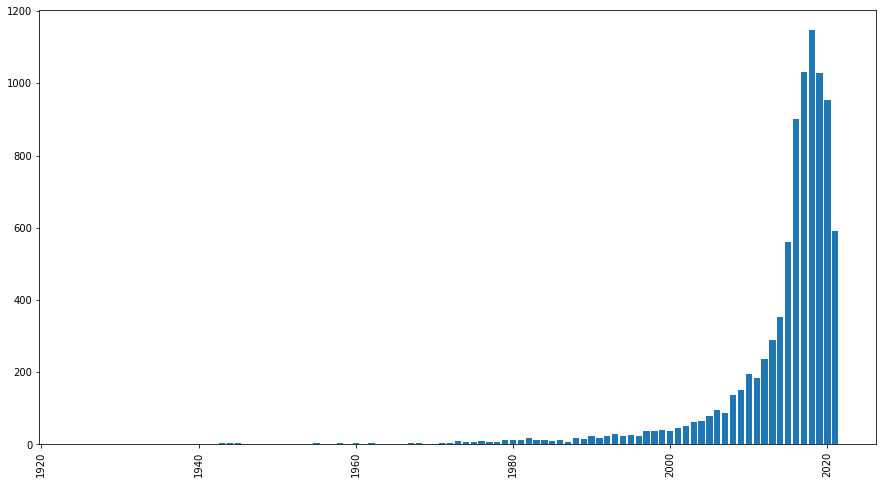

In [62]:
dfdati = df1.groupby('release_year').count()[['type']]
labels = dfdati.index
dati = dfdati['type']

fig, ax = plt.subplots(figsize=(15,8))
ax.bar(labels, dati, label='Film rilasciati per ogni anno')
plt.xticks(rotation=90)
plt.show()

9. il grafico a torta dell'esercizio 7


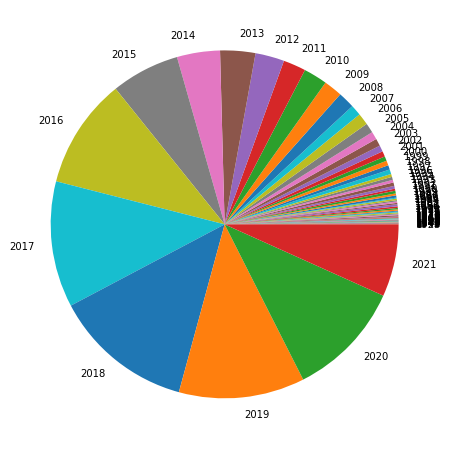

In [63]:
dfdati = df1.groupby('release_year').count()[['type']]
labels = dfdati.index
dati = dfdati['type']

plt.figure(figsize=(15, 8))
plt.pie(dati, labels=labels)
plt.show() 